<h1> Install Packages </h1>

In [1]:
!pip install tensorflow
!pip install numpy
!pip install -U imbalanced-learn
!pip install pandas
!pip install scikit-learn
!pip install imbalanced-learn
!pip install keras-tuner

<h1> Import Packages </h1>

In [2]:
import pandas as pd
import numpy as np
import imblearn
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

2024-03-31 13:23:05.592034: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 13:23:06.914180: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<h1> Inspect Dataset (Before ROS) </h1>

In [3]:
final_df = pd.read_csv('../aug_final_df.csv')

final_df.head()

,Emotions,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,13,Ravdess\03-01-01-01-01-01-01.wav,-562.151506,31.979038,1.889848,8.659115,4.850125,-1.467678,-3.232874,-6.313390,...,0.000007,0.000005,0.000005,3.633485e-06,0.004597,0.015390,-0.033435,0.012520,-0.002898,0.007177
1,5,Ravdess\03-01-01-01-01-01-02.wav,-522.032804,30.843309,-6.888712,0.897592,-5.138569,-6.227784,-7.008630,-8.825021,...,0.000011,0.000011,0.000009,6.912152e-06,-0.021170,0.009388,0.005586,-0.013296,-0.003911,0.006994
2,13,Ravdess\03-01-01-01-01-01-03.wav,-561.167449,41.730094,-3.696491,5.630562,1.918353,-4.579504,-9.961748,-6.453885,...,0.000020,0.000028,0.000017,3.894878e-06,-0.005082,-0.004964,0.005950,0.021505,-0.008038,-0.009597
3,5,Ravdess\03-01-01-01-01-01-04.wav,-631.621801,33.719122,-7.336527,6.547586,-4.442126,-5.229694,-6.480212,-11.788281,...,0.000017,0.000012,0.000006,8.970399e-07,-0.007362,0.007175,-0.012972,0.007889,-0.013610,0.004167
4,13,Ravdess\03-01-01-01-01-01-05.wav,-532.558528,29.025310,9.827110,7.885900,3.647080,-1.234414,-3.232563,-3.385255,...,0.000011,0.000011,0.000010,9.498596e-06,0.008078,0.029084,-0.044486,0.003232,0.006687,0.003168


# Shuffle Dataset

In [4]:
final_df = shuffle(final_df)
final_df

,Emotions,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
8206,13,Crema\1083_TAI_NEU_XX.wav,-375.879949,87.229939,37.952981,31.644681,8.728899,12.111093,-7.573689,-6.707222,...,4.346310e-05,4.821321e-05,4.961289e-05,4.807584e-05,-0.006123,-0.016883,-0.077188,0.017070,0.009372,-0.006263
5930,6,Crema\1055_WSI_SAD_XX.wav,-360.602943,60.427345,36.976977,19.352825,7.350885,5.914095,-1.543384,-2.014942,...,2.155195e-04,1.993399e-04,1.889070e-04,1.943661e-04,-0.001351,0.009600,-0.053803,-0.016216,0.023085,-0.001178
8400,10,Crema\1086_IEO_DIS_LO.wav,-357.716879,58.094127,29.226542,22.448245,10.937257,7.289203,8.233194,4.379683,...,1.983271e-04,2.096182e-04,2.051771e-04,2.167417e-04,-0.031340,0.003760,-0.052949,-0.008822,0.009434,0.014702
11264,5,Tess\YAF_neutral\YAF_void_neutral.wav,-379.649929,55.975297,5.332893,20.328261,1.390439,-6.717421,0.455092,-11.481354,...,6.230172e-04,8.403262e-04,1.334925e-03,2.093415e-04,-0.039905,0.098919,0.264337,0.118162,-0.016646,-0.071704
3100,6,Crema\1021_ITS_SAD_XX.wav,-471.355711,118.684453,29.094169,55.538401,-0.824342,21.979305,-10.155997,12.809792,...,4.317724e-07,4.515330e-07,4.190520e-07,4.127792e-07,0.028082,0.002004,-0.050546,-0.046062,0.006593,-0.004453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,4,Crema\1008_IWL_HAP_XX.wav,-331.036475,84.808833,11.501164,16.923801,0.957797,2.597710,6.387719,-0.880166,...,8.301469e-05,1.012491e-04,9.490997e-05,1.007982e-04,0.004111,-0.006968,-0.084505,-0.027120,0.016325,0.018286
722,8,Ravdess\03-01-05-01-02-01-03.wav,-500.816414,46.214782,-4.908835,8.692145,0.905376,-3.128283,-11.319257,-12.705559,...,6.830807e-05,9.706546e-05,5.349084e-05,6.833113e-06,-0.006791,-0.010166,0.019461,-0.017604,0.005391,0.004739
5027,13,Crema\1044_WSI_NEU_XX.wav,-290.469306,61.754656,28.360118,20.419248,6.732440,5.121650,1.962201,-1.549692,...,6.534831e-04,6.383503e-04,6.110308e-04,6.602030e-04,0.003372,-0.006772,-0.016681,-0.073169,0.015696,-0.010326
5672,6,Crema\1052_TIE_SAD_XX.wav,-442.251973,122.020240,27.485716,47.943850,-2.013593,15.189649,-10.135990,8.565899,...,1.090449e-06,1.121717e-06,1.066468e-06,1.077633e-06,-0.004023,-0.024594,-0.078162,-0.062193,0.010370,0.023183


<h1> Sanitise Dataset (Target = Emotions) </h1>

In [5]:
final_df_testing = final_df.copy()

X = final_df_testing.drop(columns=['Path', 'Emotions'], axis=1)
y = final_df_testing['Emotions']
print(X.shape, y.shape)

(11682, 173) (11682,)


<h1> ROS </h1>

In [6]:
ros = RandomOverSampler(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_ros_train, y_ros_train = ros.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('\n')
print('Resample dataset shape', Counter(y_ros_train))

Original dataset shape Counter({3: 902, 4: 882, 6: 870, 0: 860, 2: 853, 5: 766, 14: 629, 8: 623, 12: 623, 10: 616, 11: 614, 13: 493, 7: 379, 9: 86, 1: 76, 15: 73})


Resample dataset shape Counter({3: 902, 2: 902, 10: 902, 7: 902, 14: 902, 5: 902, 4: 902, 8: 902, 12: 902, 6: 902, 0: 902, 1: 902, 13: 902, 11: 902, 9: 902, 15: 902})


In [7]:
X_train

,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
10724,-239.381774,22.400233,-9.134252,1.763294,-2.978281,-4.819090,-0.849486,-4.263982,-7.293020,1.463038,...,0.007465,0.011544,0.009262,0.001773,-0.007260,0.054981,-0.037586,-0.040298,-0.036582,0.006083
1093,-483.292735,24.762895,0.964909,-2.832116,-6.687714,-8.313357,-9.028663,-8.707909,-5.579808,-4.670424,...,0.000158,0.000107,0.000042,0.000021,-0.005689,0.003231,0.005263,-0.010668,-0.003373,0.004280
8154,-469.379260,96.146279,32.680768,37.673245,7.083738,21.660251,-3.063815,4.407521,0.870637,0.922154,...,0.000003,0.000003,0.000003,0.000003,0.033387,-0.011676,-0.061803,-0.034439,-0.006077,-0.019758
11403,-187.908151,12.062129,-1.375162,-1.825224,-0.680837,-0.084257,-3.840037,-6.770680,-1.132296,1.894857,...,0.017224,0.018938,0.018082,0.013863,-0.004220,-0.005085,-0.021258,0.020626,-0.003151,0.001317
2702,-343.360046,67.870471,37.186132,23.712807,12.777805,4.104750,1.701299,-0.767358,-2.482746,-1.928978,...,0.000267,0.000256,0.000265,0.000280,-0.018128,-0.028406,-0.061787,-0.011157,0.022853,-0.011352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8757,-453.395609,87.597829,44.119733,35.308614,18.242399,16.546558,-1.022664,3.407847,1.450084,2.738581,...,0.000011,0.000012,0.000011,0.000011,-0.021414,0.010360,-0.063153,-0.008748,0.013985,-0.003665
4942,-416.377742,96.470094,40.217970,28.444921,8.922342,8.546275,-2.183341,1.453638,-6.010732,3.481221,...,0.000018,0.000018,0.000019,0.000019,0.014113,0.007312,-0.083607,-0.003085,0.009772,-0.014698
1041,-406.570663,22.889118,-4.516907,1.134652,-6.264053,-9.290780,-9.608830,-13.125176,-6.412611,-5.107107,...,0.000280,0.000357,0.000230,0.000092,0.016597,-0.006146,0.002155,0.015089,-0.003895,0.005347
11559,-380.722988,56.467219,30.702829,42.661060,-4.012027,-0.308188,-1.649255,-12.854694,-2.363138,-7.201521,...,0.002402,0.003273,0.002309,0.000287,0.097840,-0.042312,-0.067178,-0.037408,0.035251,0.067846


<h1> Model Building and Model Tuning </h1>

In [8]:
model = tf.keras.Sequential()

model.add(layers.Conv1D(256, kernel_size=5, strides=1, 
                        padding="same", activation="relu",
                        input_shape=(X_ros_train.shape[1], 1))) 

model.add(layers.Conv1D(128, kernel_size=5, strides=1,  
                        padding="same", activation="relu")) 

model.add(layers.Conv1D(64, kernel_size=5, strides=1,  
                        padding="same", activation="relu")) 

model.add(layers.Conv1D(32, kernel_size=5, strides=1,  
                        padding="same", activation="relu")) 

model.add(layers.Flatten()) # flatten into a 1D array
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(32, activation='relu')) 

model.add(layers.Dense(len(np.unique(y_ros_train)), activation="softmax")) 
model.summary()

/common/home/projectgrps/IS424/IS424G4/jupyterlab-venv-py311/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-03-31 13:23:09.540351: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 173, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 173, 128)       │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 173, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 173, 32)        │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,417,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,678,032 (6.40 MB)

 Trainable params: 1,678,032 (6.40 MB)

 Non-trainable params: 0 (0.00 B)

# Compile Model

In [9]:
learning_rate = 1e-4

optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Model Fitting and Model Evaluation

In [10]:
# Regularisation - Define early stopping callback 
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

epochs = 100

history = model.fit(X_ros_train, y_ros_train, epochs=epochs, validation_split=0.2, callbacks=[early_stopping])  
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 50s 132ms/step - accuracy: 0.2152 - loss: 2.4616 - val_accuracy: 0.2348 - val_loss: 2.4216
Epoch 2/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 47s 130ms/step - accuracy: 0.4673 - loss: 1.6954 - val_accuracy: 0.1915 - val_loss: 2.7418
Epoch 3/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 48s 133ms/step - accuracy: 0.5374 - loss: 1.3845 - val_accuracy: 0.3187 - val_loss: 2.1543
Epoch 4/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.5700 - loss: 1.2291 - val_accuracy: 0.3291 - val_loss: 1.8763
Epoch 5/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 48s 134ms/step - accuracy: 0.5936 - loss: 1.1485 - val_accuracy: 0.4884 - val_loss: 1.5171
Epoch 6/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 48s 132ms/step - accuracy: 0.6053 - loss: 1.1187 - val_accuracy: 0.4874 - val_loss: 1.5539
Epoch 7/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 48s 133ms/step - accuracy: 0.6232 - loss: 1.0570 - val_accuracy: 0.4534 - val_loss: 1.5144
Epoch 8/100
361/361 ━━━━━━━━━━━━━━━━━━━━ 47s 131ms/step - accuracy: 0.6352 -

# Save Model

In [11]:
model_name = 'aug_CNN_tao.keras'

model.save(model_name)

# Test Saved Model

In [12]:
# Load the saved model
model_name = 'aug_CNN_tao.keras'
loaded_model = tf.keras.models.load_model(model_name)

# Evaluate the model on the test data
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5678 - loss: 1.1930
Test Loss: 1.2298091650009155, Test Accuracy: 0.5648267269134521


<h1> Visualization of Training Loss/Accuracy Over Epochs </h1>

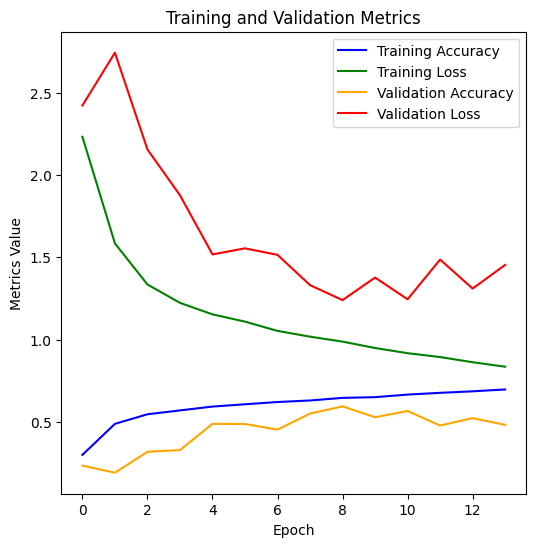

In [13]:
plt.figure(figsize=(6, 6))

# Plot Training Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')

# Plot Training Loss
plt.plot(history.history['loss'], label='Training Loss', color='green')

# Plot Validation Accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

# Plot Validation Loss
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')

plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics Value')
plt.legend()

plt.grid(False)
plt.show()


<h1> Visualization for accuracy, precision, recall and F1-Score </h1>

74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step


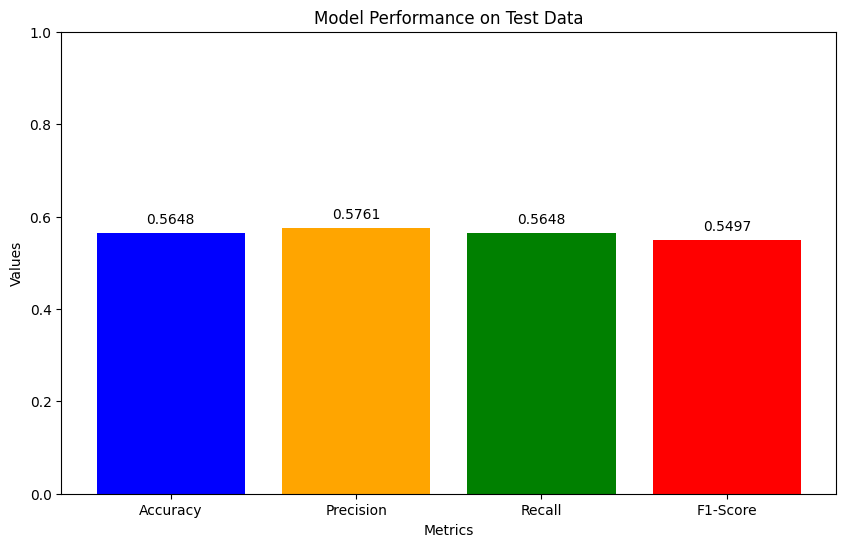

In [14]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
precision = precision_score(y_test, predicted_classes, average='weighted')
recall = recall_score(y_test, predicted_classes, average='weighted')
f1 = f1_score(y_test, predicted_classes, average='weighted')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [test_accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Performance on Test Data')
plt.ylim(0, 1)  # Assuming the metrics are in proportion (0 to 1)
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f"{value:.4f}", ha='center')
plt.show()

<h1> Visualization of Confusion Matrix and Classification Report </h1>

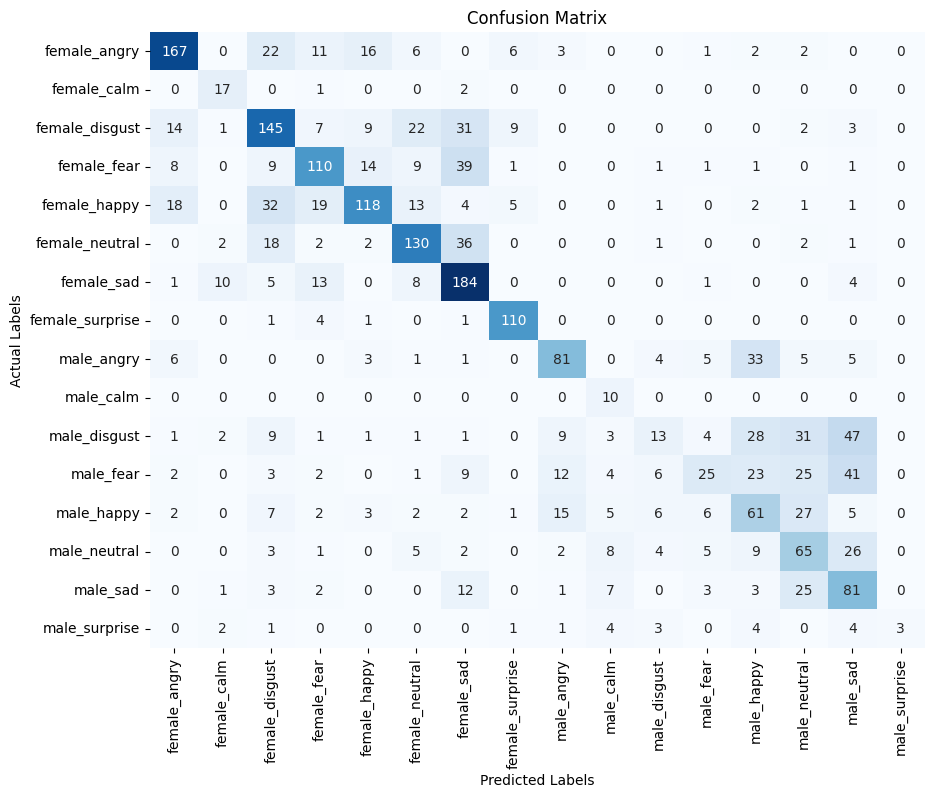

                 precision    recall  f1-score   support

   female_angry       0.76      0.71      0.73       236
    female_calm       0.49      0.85      0.62        20
 female_disgust       0.56      0.60      0.58       243
    female_fear       0.63      0.57      0.60       194
   female_happy       0.71      0.55      0.62       214
 female_neutral       0.66      0.67      0.66       194
     female_sad       0.57      0.81      0.67       226
female_surprise       0.83      0.94      0.88       117
     male_angry       0.65      0.56      0.60       144
      male_calm       0.24      1.00      0.39        10
   male_disgust       0.33      0.09      0.14       151
      male_fear       0.49      0.16      0.25       153
     male_happy       0.37      0.42      0.39       144
   male_neutral       0.35      0.50      0.41       130
       male_sad       0.37      0.59      0.45       138
  male_surprise       1.00      0.13      0.23        23

       accuracy              

In [15]:
label_map_with_gender = {
    0: 'female_angry',
    1: 'female_calm',
    2: 'female_disgust',
    3: 'female_fear',
    4: 'female_happy',
    5: 'female_neutral',
    6: 'female_sad',
    7: 'female_surprise',
    8: 'male_angry',
    9: 'male_calm',
    10: 'male_disgust',
    11: 'male_fear',
    12: 'male_happy',
    13: 'male_neutral',
    14: 'male_sad',
    15: 'male_surprise'
}

class_labels = [label_map_with_gender[i] for i in range(len(label_map_with_gender))]


cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

print(classification_report(y_test, predicted_classes, target_names=class_labels))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0b28ef1e-f6a6-4523-8903-70adcffed1c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>